In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dados = pd.read_excel('dados.xlsx', sheet_name='GEE Estados')

c:\Users\splash\Desktop\Python\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
dados = dados.drop(columns = 'Emissão / Remoção / Bunker')
dados.head(5)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [6]:
colunas_info = list(dados.loc[:,'Nível 1 - Setor':'Produto'].columns)
colunas_emissao = list(dados.loc[:,1970:2021].columns)

# conversão do dataset wide para long
df = dados.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano' , value_name = 'Emissão')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5372224 entries, 0 to 5372223
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Nível 1 - Setor      object 
 1   Nível 2              object 
 2   Nível 3              object 
 3   Nível 4              object 
 4   Nível 5              object 
 5   Nível 6              object 
 6   Gás                  object 
 7   Estado               object 
 8   Atividade Econômica  object 
 9   Produto              object 
 10  Ano                  object 
 11  Emissão              float64
dtypes: float64(1), object(11)
memory usage: 491.8+ MB


Vamos fazer uma análise exploratória dos dados para enteder as principais informações que podemos obter a partir do dataset:

In [8]:
# Identificação da classe (nível 1) que mais contribui para emissão de gases
classificacao_setor = pd.DataFrame(df.groupby('Nível 1 - Setor')['Emissão'].sum().reset_index()).sort_values(by='Emissão', ascending=False)

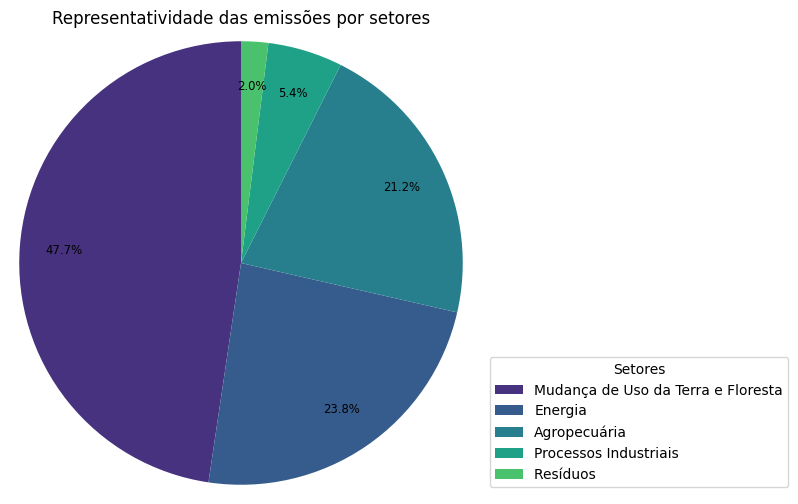

In [9]:
# Criar o gráfico de pizza
plt.figure(figsize=(25, 6))  # Define o tamanho da figura

# fig, ax = plt.subplots()
plt.pie(classificacao_setor['Emissão'],
        autopct='%1.1f%%',
        pctdistance=0.8,
        labeldistance=1.2,
        textprops={'size': 'smaller'}, radius=1.2,
        startangle=90, colors=sns.color_palette("viridis"))
plt.legend(
    classificacao_setor['Nível 1 - Setor'],
    title='Setores',
    loc='lower right', bbox_to_anchor=(1.7,0)
)

# Título do gráfico
plt.title('Representatividade das emissões por setores')
plt.show()

1. Agora vamos explorar os gases e suas respectivas emissões.  
2. Como os símbolos químicos de cada gás não são familiares, utilizei o Chat GPT para criar uma tabela relacionando os símbolos com uma especificação de cada gás.

In [26]:
classificacao_gas = pd.DataFrame(df.groupby('Gás')[['Emissão']].sum().reset_index()).sort_values(by='Emissão', ascending=False)

gases = {
    "Gás": [
        "COVNM (t)", "N2O (t)", "CO (t)", "NOx (t)", "CO2e (t) GWP-AR2",
        "CO2e (t) GTP-AR2", "CO2 (t)", "CH4 (t)", "CF4 (t)", "C2F6 (t)",
        "SF6 (t)", "HFC-23 (t)", "HFC-32 (t)", "HFC-134a (t)", "HFC-125 (t)",
        "HFC-143a (t)", "HFC-152a (t)", "CO2e (t) GWP-AR4", "CO2e (t) GTP-AR4",
        "CO2e (t) GWP-AR5", "CO2e (t) GTP-AR5", "CO2e (t) GWP-AR6", "CO2e (t) GTP-AR6"
    ],
    "Especificação": [
        "Compostos Orgânicos Voláteis Não Metânicos", "Óxido Nitroso", "Monóxido de Carbono",
        "Óxidos de Nitrogênio", "CO2 Equivalente (GWP AR2)", "CO2 Equivalente (GTP AR2)",
        "Dióxido de Carbono", "Metano", "Tetrafluoreto de Carbono", "Hexafluoreto de Etano",
        "Hexafluoreto de Enxofre", "Fluoreto de Trifluorometano", "Difluorometano",
        "1,1,1,2-Tetrafluoroetano", "Pentafluoroetano", "1,1,1-Trifluoroetano",
        "1,1-Difluoroetano", "CO2 Equivalente (GWP AR4)", "CO2 Equivalente (GTP AR4)",
        "CO2 Equivalente (GWP AR5)", "CO2 Equivalente (GTP AR5)", "CO2 Equivalente (GWP AR6)",
        "CO2 Equivalente (GTP AR6)"
    ]
}

gases = pd.DataFrame(gases)
classificacao_gas = pd.merge(classificacao_gas, gases, how='left', on='Gás')
classificacao_gas = classificacao_gas[['Gás', 'Especificação', 'Emissão']]
classificacao_gas

,Gás,Especificação,Emissão
0,CO2e (t) GWP-AR5,CO2 Equivalente (GWP AR5),7.048576e+10
1,CO2e (t) GWP-AR6,CO2 Equivalente (GWP AR6),6.999228e+10
2,CO2e (t) GWP-AR4,CO2 Equivalente (GWP AR4),6.882629e+10
3,CO2e (t) GWP-AR2,CO2 Equivalente (GWP AR2),6.584700e+10
4,CO2e (t) GTP-AR2,CO2 Equivalente (GTP AR2),5.193173e+10
5,CO2e (t) GTP-AR4,CO2 Equivalente (GTP AR4),5.193173e+10
6,CO2e (t) GTP-AR6,CO2 Equivalente (GTP AR6),5.094025e+10
7,CO2e (t) GTP-AR5,CO2 Equivalente (GTP AR5),5.027836e+10
8,CO2 (t),Dióxido de Carbono,4.153325e+10
9,CH4 (t),Metano,8.031840e+08
